In [70]:
import pandas as pd

In [71]:
data = pd.read_excel(r'C:\Users\Akash Sharma\Downloads\Life Expectancy 2015 World Data.xlsx')

In [72]:
data.head()

,Country,Year,Developed,Life expectancy,infant deaths,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population
0,Afghanistan,2015,0,65.0,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494.0
1,Albania,2015,0,77.8,0,99,0,58.0,0,99,99,0.1,3954.227830,28873.0
2,Algeria,2015,0,75.6,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528.0
3,Angola,2015,0,52.4,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935.0
4,Argentina,2015,0,76.3,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765.0


In [73]:
data.describe()

,Year,Developed,Life expectancy,infant deaths,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population
count,130.0,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,1.300000e+02
mean,2015.0,0.146154,70.741538,27.723077,80.653846,1773.315385,40.533077,36.761538,81.123077,82.846154,0.785385,5997.928670,1.163121e+07
std,0.0,0.354627,7.997381,96.426702,24.992933,9130.704172,21.196345,123.951904,25.435133,23.289370,1.520206,10101.952401,3.017667e+07
min,2015.0,0.000000,51.000000,0.000000,6.000000,0.000000,2.500000,0.000000,6.000000,6.000000,0.100000,33.681223,2.966000e+03
25%,2015.0,0.000000,65.725000,0.000000,77.250000,0.000000,23.325000,1.000000,78.250000,78.000000,0.100000,702.333884,2.423205e+05
50%,2015.0,0.000000,72.150000,3.000000,91.000000,16.500000,41.300000,3.000000,91.500000,92.500000,0.100000,2231.867706,1.894576e+06
75%,2015.0,0.000000,76.025000,20.500000,96.000000,210.500000,61.200000,25.500000,97.000000,97.000000,0.500000,6311.780768,1.095208e+07
max,2015.0,1.000000,85.000000,910.000000,99.000000,90387.000000,77.600000,1100.000000,99.000000,99.000000,9.300000,56554.387600,2.581621e+08


In [110]:
predictors = ['Measles ','Developed','infant deaths','Hepatitis B',' BMI','Polio','Diphtheria ','under-five deaths ',' HIV/AIDS','GDP','Population']
outcome = ['Life expectancy ']

In [112]:
x = data[predictors]
x

,Measles,Developed,infant deaths,Hepatitis B,BMI,Polio,Diphtheria,under-five deaths,HIV/AIDS,GDP,Population
0,1154,0,62,65,19.1,6,65,83,0.1,584.259210,33736494.0
1,0,0,0,99,58.0,99,99,0,0.1,3954.227830,28873.0
2,63,0,21,95,59.5,95,95,24,0.1,4132.762920,39871528.0
3,118,0,66,64,23.3,7,64,98,1.9,3695.793748,2785935.0
4,0,0,8,94,62.8,93,94,9,0.1,13467.123600,43417765.0
...,...,...,...,...,...,...,...,...,...,...,...
125,0,0,0,95,64.0,95,95,0,0.1,15524.842470,3431552.0
126,22,0,15,99,44.7,99,99,17,0.1,2137.576852,312989.0
127,39,0,0,64,53.3,65,64,0,0.1,285.834140,26463.0
128,9,0,27,9,23.4,9,9,40,4.1,1313.889646,161587.0


In [113]:
y = data[outcome]
y

,Life expectancy
0,65.0
1,77.8
2,75.6
3,52.4
4,76.3
...,...
125,77.0
126,69.4
127,72.0
128,61.8


In [114]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm

In [115]:
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [116]:
from dmba import regressionSummary, exhaustive_search

In [117]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=1)

In [118]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import matplotlib.pylab as plt

In [119]:
data_lm = LinearRegression()
data_lm.fit(train_x, train_y)

LinearRegression()

In [120]:
print('intercept ', data_lm.intercept_)
print(pd.DataFrame({'Predictor': [x.columns], 'coefficient': [data_lm.coef_]}))

intercept  [59.78801656]
                                           Predictor  \
0  Index(['Measles ', 'Developed', 'infant deaths...   

                                         coefficient  
0  [[5.186542950058189e-05, 3.5468871573306813, 0...  


In [121]:
data_lm.coef_

array([[ 5.18654295e-05,  3.54688716e+00,  1.57380534e-01,
        -1.61582609e-02,  1.13323907e-01,  5.82848672e-02,
         3.47014437e-02, -1.30811969e-01, -1.88533296e+00,
         9.72095611e-05,  6.37775375e-08]])

In [122]:
pred_y = data_lm.predict(train_x)
print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, data_lm))
print('AIC : ', AIC_score(train_y, pred_y, data_lm))
print('BIC : ', BIC_score(train_y, pred_y, data_lm))

adjusted r2 :  0.725858103711441
AIC :  598.2575633715078
BIC :  606.1907360689319


In [123]:
data_lm_pred = data_lm.predict(test_x)
# Compute common accuracy measures
regressionSummary(test_y, data_lm_pred)


Regression statistics

                      Mean Error (ME) : 0.2575
       Root Mean Squared Error (RMSE) : 5.6610
            Mean Absolute Error (MAE) : 4.2928
          Mean Percentage Error (MPE) : 0.0573
Mean Absolute Percentage Error (MAPE) : 6.0695


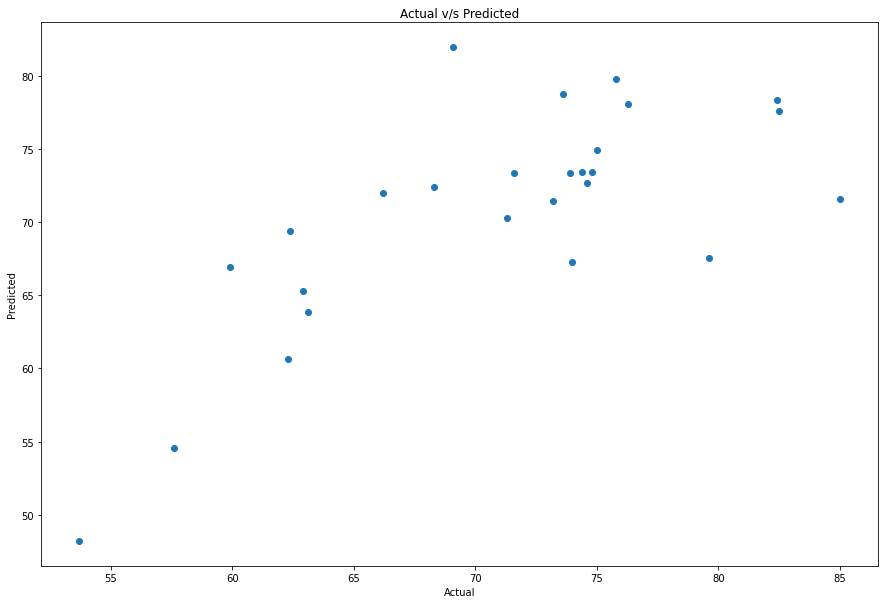

In [124]:
Predicted = data_lm_pred
Actual=test_y
plt.figure(figsize=(15,10))
plt.scatter(Actual,Predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual v/s Predicted')
plt.show()

In [125]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_x[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_x[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_x.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_x[variables]), model)
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')

     n     r2adj         AIC    BMI   HIV/AIDS  Developed  Diphtheria     GDP  Hepatitis B  \
0    1  0.360631  686.328514  False       True      False        False  False        False   
1    2  0.558313  647.860937   True       True      False        False  False        False   
2    3  0.628943  629.739413   True       True      False        False  False        False   
3    4  0.678094  614.961449   True       True       True        False  False        False   
4    5  0.695488  609.184203   True       True       True        False   True        False   
5    6  0.704565  606.037069   True       True       True        False   True        False   
6    7  0.711870  603.433204   True       True       True        False   True        False   
7    8  0.722623  599.477800   True       True       True        False   True        False   
8    9  0.724459  598.787013   True       True       True         True   True        False   
9   10  0.725278  598.477339   True       True       True   

In [126]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_x[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_x[variables]), model)

best_model, best_variables = backward_elimination(train_x.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Measles , Developed, infant deaths, Hepatitis B,  BMI, Polio, Diphtheria , under-five deaths ,  HIV/AIDS, GDP, Population
Start: score=598.26
Step: score=598.26, remove None
['Measles ', 'Developed', 'infant deaths', 'Hepatitis B', ' BMI', 'Polio', 'Diphtheria ', 'under-five deaths ', ' HIV/AIDS', 'GDP', 'Population']


In [127]:
regressionSummary(test_y, best_model.predict(test_x[best_variables]))


Regression statistics

                      Mean Error (ME) : 0.2575
       Root Mean Squared Error (RMSE) : 5.6610
            Mean Absolute Error (MAE) : 4.2928
          Mean Percentage Error (MPE) : 0.0573
Mean Absolute Percentage Error (MAPE) : 6.0695


In [128]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_x[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_x[variables]), model)

best_model, best_variables = forward_selection(train_x.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Measles , Developed, infant deaths, Hepatitis B,  BMI, Polio, Diphtheria , under-five deaths ,  HIV/AIDS, GDP, Population
Start: score=731.86, constant
Step: score=686.33, add  HIV/AIDS
Step: score=647.86, add  BMI
Step: score=629.74, add Polio
Step: score=614.96, add Developed
Step: score=609.18, add GDP
Step: score=606.04, add under-five deaths 
Step: score=603.43, add infant deaths
Step: score=599.48, add Population
Step: score=598.79, add Diphtheria 
Step: score=598.48, add Measles 
Step: score=598.26, add Hepatitis B
Step: score=598.26, add None
[' HIV/AIDS', ' BMI', 'Polio', 'Developed', 'GDP', 'under-five deaths ', 'infant deaths', 'Population', 'Diphtheria ', 'Measles ', 'Hepatitis B']


In [129]:
best_model, best_variables = stepwise_selection(train_x.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Measles , Developed, infant deaths, Hepatitis B,  BMI, Polio, Diphtheria , under-five deaths ,  HIV/AIDS, GDP, Population
Start: score=731.86, constant
Step: score=686.33, add  HIV/AIDS
Step: score=647.86, add  BMI
Step: score=629.74, add Polio
Step: score=614.96, add Developed
Step: score=609.18, add GDP
Step: score=606.04, add under-five deaths 
Step: score=603.43, add infant deaths
Step: score=599.48, add Population
Step: score=598.79, add Diphtheria 
Step: score=598.48, add Measles 
Step: score=598.26, add Hepatitis B
Step: score=598.26, unchanged None
[' HIV/AIDS', ' BMI', 'Polio', 'Developed', 'GDP', 'under-five deaths ', 'infant deaths', 'Population', 'Diphtheria ', 'Measles ', 'Hepatitis B']


# final model with best variables

In [130]:
data = pd.read_excel(r'C:\Users\Akash Sharma\Downloads\Life Expectancy 2015 World Data.xlsx')

In [133]:
predictors = ['Measles ','Developed','infant deaths','Hepatitis B',' BMI','Polio','Diphtheria ','under-five deaths ',' HIV/AIDS','GDP','Population']
outcome = ['Life expectancy ']
x = data[predictors]
y = data[outcome]
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=1)
data_lm = LinearRegression()
data_lm.fit(train_x, train_y)
pred_y = data_lm.predict(test_x)

In [134]:
#predicted value
pred_y

array([[65.27483244],
       [71.42956865],
       [73.36365577],
       [70.24831382],
       [72.68647293],
       [78.73657909],
       [67.29862185],
       [69.38374362],
       [72.41275579],
       [79.75073551],
       [67.57338925],
       [78.31141073],
       [63.84927172],
       [73.3926678 ],
       [73.33918174],
       [60.60598618],
       [74.93880611],
       [77.58381975],
       [78.03972435],
       [48.19810087],
       [81.96345933],
       [73.43252209],
       [71.95878107],
       [71.55097657],
       [54.53144525],
       [66.9489464 ]])

In [135]:
#Actual values
test_y.values

array([[62.9],
       [73.2],
       [73.9],
       [71.3],
       [74.6],
       [73.6],
       [74. ],
       [62.4],
       [68.3],
       [75.8],
       [79.6],
       [82.4],
       [63.1],
       [74.8],
       [71.6],
       [62.3],
       [75. ],
       [82.5],
       [76.3],
       [53.7],
       [69.1],
       [74.4],
       [66.2],
       [85. ],
       [57.6],
       [59.9]])

In [136]:
from sklearn.metrics import r2_score
r2_score(test_y.values,pred_y)

0.4730234692318128

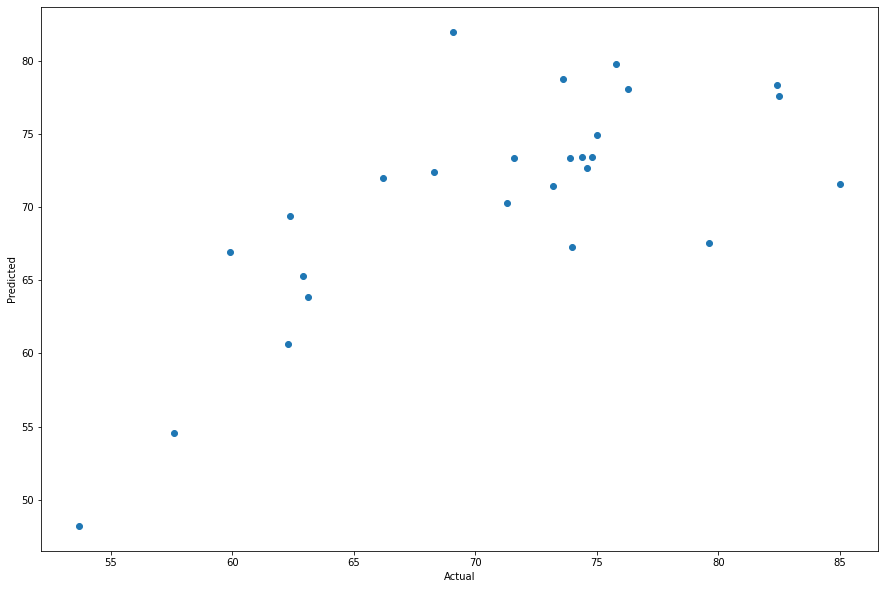

In [137]:
plt.figure(figsize=(15,10))
plt.scatter(test_y.values,pred_y)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [138]:
#checking prediction for new variable

In [140]:
new_data = pd.DataFrame([{'Measles ':0,'Developed':0,'infant deaths':20,'Hepatitis B':90,' BMI':32,'Polio':80,'Diphtheria ':90,'under-five deaths ':35,' HIV/AIDS':6.2,'GDP':120.98,'Population':1768650}])
new_data

,Measles,Developed,infant deaths,Hepatitis B,BMI,Polio,Diphtheria,under-five deaths,HIV/AIDS,GDP,Population
0,0,0,20,90,32,80,90,35,6.2,120.98,1768650


In [143]:
print('Life expectancy:',data_lm.predict(new_data))

Life expectancy: [[56.75074539]]
